## TOPIC:  Clinical Decision Making and Pattern Recognition in Health Care

### About Data
In this project, we are using the "Cleveland Data CLEANED AND TRIMMED.csv" heart disease dataset provided. It is a subset of the "Cleveland" dataset that can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Business Objective
I want to improve the heart health of its patients. I have obtained a dataset that contains a variety of demographics and health-related information for a group of patients. It also includes a CLASS variable "num" that indicates the heart health of each of the patients. 

I will identify the classifier that would predict the CLASS of new patients so they can be enrolled for treatments based on their demographic data. The identified classifier will help save the Doctor’s time by analyzing the previous health history of the patient and placing the patient in the correct class of risk and also based on class  treatment cost will be calculated.

The different classes are  :

* No heart health issues / risk- 0
* Slight heart health issues / risk- 1
* Moderate heart health issues / risk- 2
* High heart health issues / risk- 3
* Extreme heart health issue / risk- 4


The COSTs (in dollars) of the treatments are as follows, based on the predicted class of each patient:

Note: The Costs are assumed on a random basis.

0) Tiny intervention: 100
1) Minor intervention: 200
2) Moderate intervention: 300 
3) Significant intervention: 400 
4) Extreme intervention: 500

        
I would be evaluating 3 classifiers i.e Random forest, SVM , XGBoost and decide on the best classifier based on the performance metrics to predict the class of new patient and calculate treatment cost.


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils import resample, shuffle
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Load the dataset
data = pd.read_csv(r"C:\Users\91970\Downloads\DM\Final Project\Cleveland Data CLEANED AND TRIMMED.csv")

In [24]:
data

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,278,39,0,3,138,220,0,0,152,0,0.0,2,0,3,0
278,279,57,1,2,154,232,0,2,164,0,0.0,1,1,3,1
279,280,58,0,4,130,197,0,0,131,0,0.6,2,0,3,0
280,281,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2


In [26]:
# Drop unnecessary columns like 'id'
cleaned_data = data.drop(columns=['id'])

In [28]:
# Splitting the data into features and target
X = cleaned_data.drop(columns=['num'])
y = cleaned_data['num'].astype(int)

#### If the target variable (e.g., num in this dataset) is imbalanced, the model might become biased towards the majority class because it is seen more often during training. This means the model might predict the majority class more frequently, even for cases where the minority class is more appropriate.

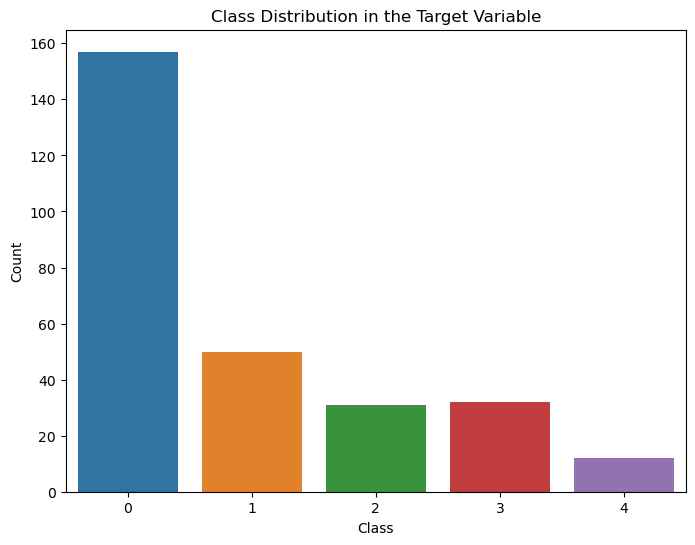

In [43]:
# Visualize the class distribution to check imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution in the Target Variable')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#### By oversampling the minority classes, you create a more balanced dataset where the model sees an equal or more representative number of instances from each class. This helps the model learn from all classes more effectively

In [47]:
# Oversample the minority classes
X_resampled, y_resampled = X, y

for i in range(1, y.max() + 1):
    X_upsample, y_upsample = resample(X[y == i], y[y == i],
                                      replace=True,  # sample with replacement
                                      n_samples=X[y == 0].shape[0],  # match number of majority class
                                      random_state=42)
    X_resampled = np.vstack((X_resampled, X_upsample))
    y_resampled = np.hstack((y_resampled, y_upsample))

### Shuffling breaks any order or sequence that may exist in the dataset, ensuring that the model learns from the features rather than any artificial patterns introduced by the data's order

In [50]:
# Shuffle the resampled data
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

#### By splitting the data into training and test sets, you can train the model on one set (training data) and evaluate its performance on a separate set of data (test data) that the model hasn't seen before. This helps you assess how well the model generalizes to new data.

In [53]:
# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#### Feature scaling ensures that all features contribute equally to the model by bringing them to a common scale, typically between 0 and 1 (min-max scaling) or a mean of 0 and standard deviation of 1 (standardization).

In [56]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Initialize models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [60]:
# Define hyperparameter grids for tuning
param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}

In [62]:
# Initialize dictionaries to store best models and scores
best_models = {}
best_scores = {}

In [64]:
# Tune and evaluate each model
for model_name in models.keys():
    model = models[model_name]
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    best_scores[model_name] = grid_search.best_score_

In [66]:
# Identify the best model based on cross-validated accuracy
best_model_name = max(best_scores, key=best_scores.get)
best_model = best_models[best_model_name]

In [68]:
# Evaluate the best model on the test set
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)


In [69]:
# Calculate accuracy and classification report for the best model
accuracy_best = accuracy_score(y_test, y_pred)
classification_rep_best = classification_report(y_test, y_pred)

In [72]:
# Predicting the class of a new patient with the best model
new_patient_data = [63, 1, 3, 145, 233, 1, 2, 150, 0, 2.3, 3, 0, 6]
new_patient_scaled = scaler.transform([new_patient_data])
predicted_class_best = best_model.predict(new_patient_scaled)[0]
treatment_cost_best = 100 * (predicted_class_best + 1)

In [74]:
# Output the results
print(f"Best Model: {best_model_name}")
print(f"Model Accuracy: {accuracy_best}")
print(f"Classification Report:\n{classification_rep_best}")
print(f"Predicted Class for New Patient: {predicted_class_best}")
print(f"Estimated Treatment Cost: ${treatment_cost_best}")

Best Model: XGBoost
Model Accuracy: 0.9285714285714286
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.91      0.91      0.91        44
           2       0.84      1.00      0.91        37
           3       0.97      1.00      0.99        35
           4       1.00      1.00      1.00        36

    accuracy                           0.93       182
   macro avg       0.94      0.92      0.92       182
weighted avg       0.93      0.93      0.93       182

Predicted Class for New Patient: 0
Estimated Treatment Cost: $100


### RESULT
#### With the given new patients input model predicted that patient class is 0 which is No heart health issues / risk and treatment cost is 100